<a href="https://colab.research.google.com/github/MueezAmj/A2_ML2_Bayes/blob/dev/ML_Assignment1_sem2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

In [59]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
business_data1 = pd.read_csv('/content/drive/MyDrive/yelp_academic_dataset_business.csv')
review_data1 = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_review.csv')
user_data1 = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_user.csv')
checkin_data1 = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_checkin.csv')
tip_data1 = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_tip.csv')

<ipython-input-60-1b49bf608321>:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  user_data1 = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_user.csv')


BUSINESS DATA

In [61]:
business_data1.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [62]:
business_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       145219 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150273 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


In [63]:
business_data1.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [64]:
business_data1.isnull()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150341,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150342,False,False,False,False,False,False,False,False,False,False,False,False,False,False
150343,False,False,False,False,False,False,False,False,False,False,False,False,False,True
150344,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [65]:
print(business_data1.isnull().sum())


business_id         0
name                0
address          5127
city                0
state               0
postal_code        73
latitude            0
longitude           0
stars               0
review_count        0
is_open             0
attributes      13744
categories        103
hours           23223
dtype: int64


Columns with No Missing Values: business_id, name, city, state, latitude, longitude, stars, review_count, and is_open do not have missing values, so no action is needed for them.

Columns with High Missing Values: attributes (13744 missing values) and hours (23223 missing values): These columns have a substantial number of missing values, and imputing them might introduce too much noise.

Columns with Moderate Missing Values: postal_code (73 missing values), categories (103 missing values): Since this is an important feature, it’s better to impute or remove these missing row, address (5127 missing values):

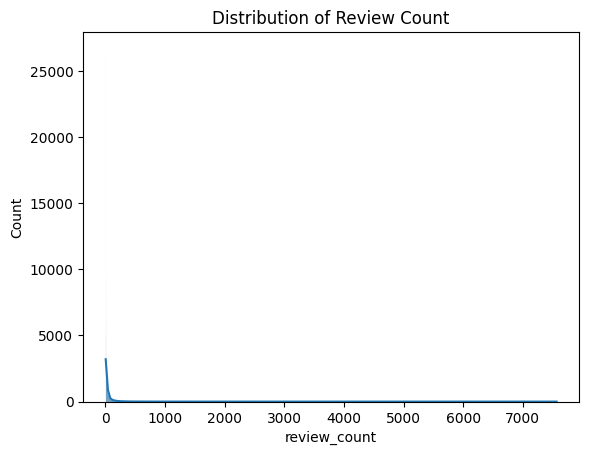

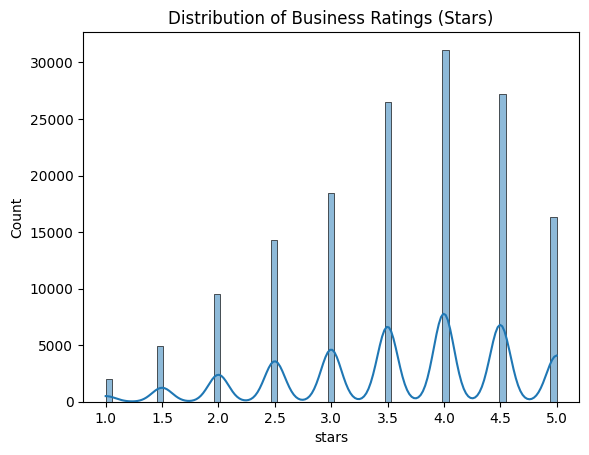

In [66]:
# Visualize the distribution of numerical features
sns.histplot(business_data1['review_count'], kde=True)
plt.title('Distribution of Review Count')
plt.show()

sns.histplot(business_data1['stars'], kde=True)
plt.title('Distribution of Business Ratings (Stars)')
plt.show()

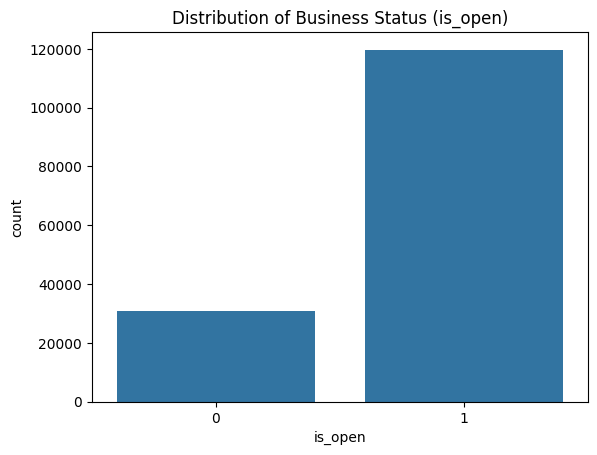

is_open
1    79.615021
0    20.384979
Name: proportion, dtype: float64


In [67]:
# Explore the target variable 'is_open'
sns.countplot(x='is_open', data=business_data1)
plt.title("Distribution of Business Status (is_open)")
plt.show()

# Check the percentage distribution
print(business_data1['is_open'].value_counts(normalize=True) * 100)

<ipython-input-68-7e6d0c704c54>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=categories_count.index, x=categories_count.values, palette='viridis')


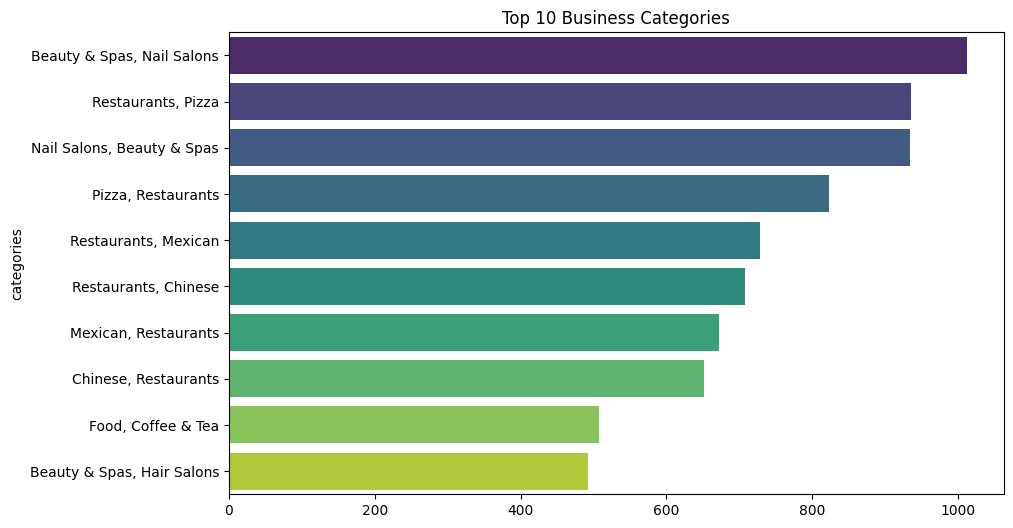

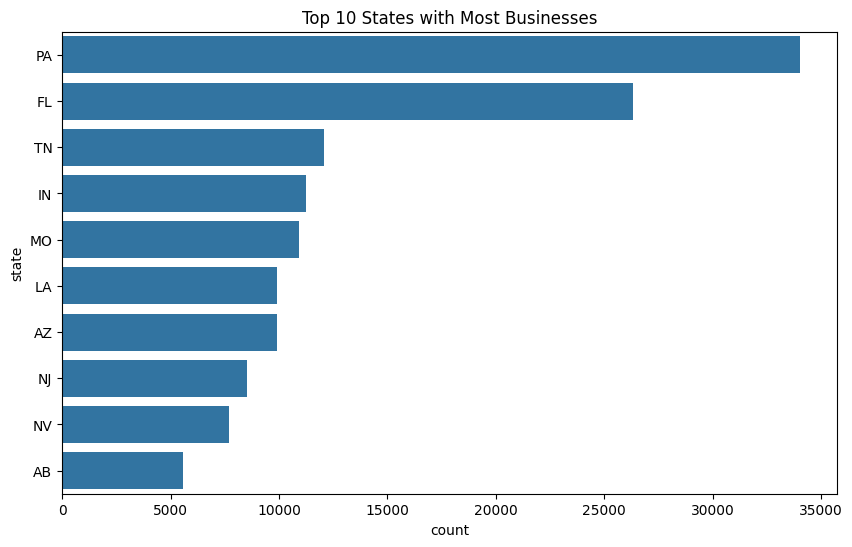

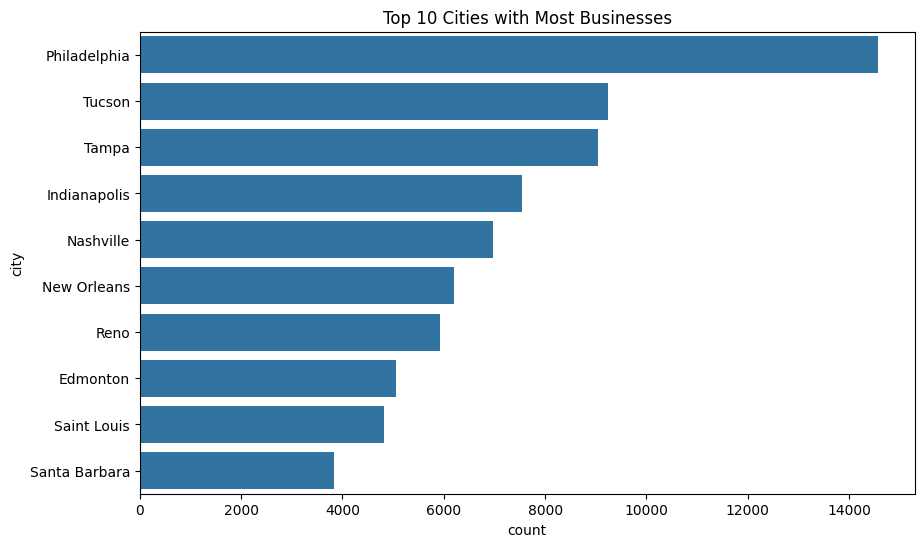

In [68]:
# Explore 'categories' column (Top categories)
categories_count = business_data1['categories'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=categories_count.index, x=categories_count.values, palette='viridis')
plt.title('Top 10 Business Categories')
plt.show()

# Explore 'state' and 'city' columns
plt.figure(figsize=(10,6))
sns.countplot(y='state', data=business_data1, order=business_data1['state'].value_counts().head(10).index)
plt.title("Top 10 States with Most Businesses")
plt.show()

# City
plt.figure(figsize=(10,6))
sns.countplot(y='city', data=business_data1, order=business_data1['city'].value_counts().head(10).index)
plt.title("Top 10 Cities with Most Businesses")
plt.show()

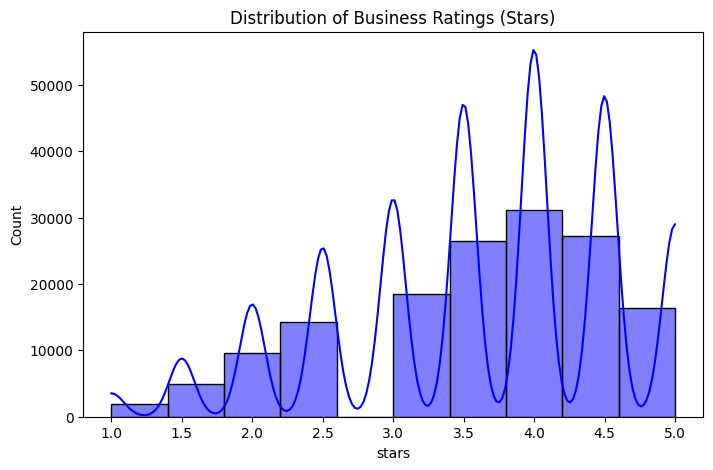

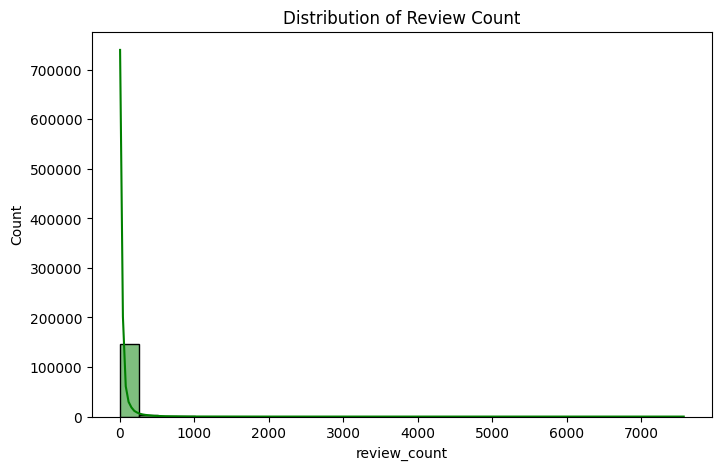

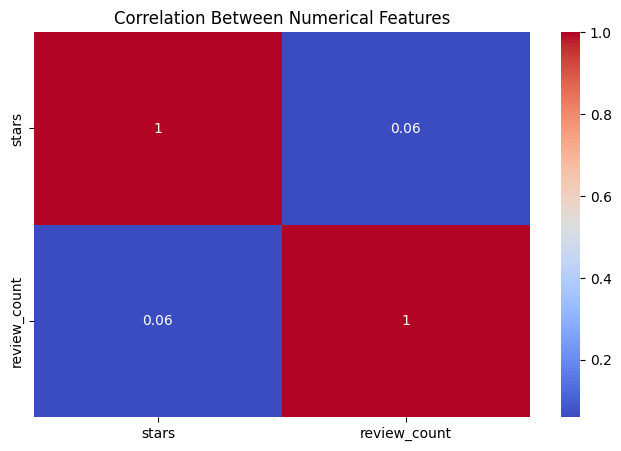

In [69]:
plt.figure(figsize=(8,5))
sns.histplot(business_data1['stars'], kde=True, bins=10, color='blue')
plt.title('Distribution of Business Ratings (Stars)')
plt.show()

# Distribution of 'review_count'
plt.figure(figsize=(8,5))
sns.histplot(business_data1['review_count'], kde=True, bins=30, color='green')
plt.title('Distribution of Review Count')
plt.show()

# Check correlation between numerical features
plt.figure(figsize=(8,5))
sns.heatmap(business_data1[['stars', 'review_count']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()

Missing Values: Columns like attributes and hours had a significant amount of missing data, Minor missing values in address, postal_code, and categories were handled by either filling or removing rows.

Categorical Features: The categories column shows the types of businesses, and we focused on creating a binary feature for identifying restaurants (is_restaurant). The state and city columns had to be label encoded for machine learning algorithms.

Numerical Features: The distribution of stars (ratings) is relatively normal, while review_count is heavily skewed, with most businesses having a low number of reviews. We scaled both features to normalize them for model training.

CHECKIN DATA

In [70]:
checkin_data1.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [71]:
checkin_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [72]:
checkin_data1.describe()

,business_id,date
count,131930,131930
unique,131930,131930
top,zzyx5x0Z7xXWWvWnZFuxlQ,2015-01-06 17:51:53
freq,1,1


In [73]:
checkin_data1.isnull()

,business_id,date
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
131925,False,False
131926,False,False
131927,False,False
131928,False,False


REVIEW DATA

In [74]:
review_data1.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [75]:
review_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   review_id    object
 1   user_id      object
 2   business_id  object
 3   stars        int64 
 4   useful       int64 
 5   funny        int64 
 6   cool         int64 
 7   text         object
 8   date         object
dtypes: int64(4), object(5)
memory usage: 480.0+ MB


In [76]:
review_data1.shape


(6990280, 9)

In [77]:
missing_values = review_data1.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


<ipython-input-78-55779d5ba3f7>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stars', data=review_data1, palette='viridis')


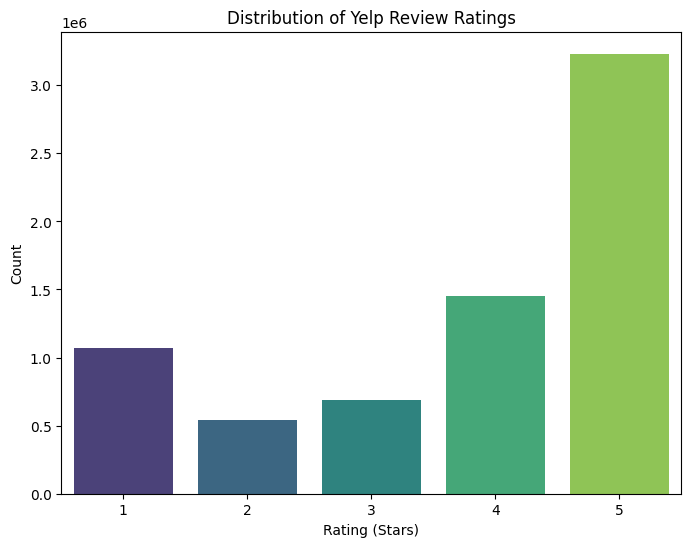

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of review ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='stars', data=review_data1, palette='viridis')
plt.title('Distribution of Yelp Review Ratings')
plt.xlabel('Rating (Stars)')
plt.ylabel('Count')
plt.show()

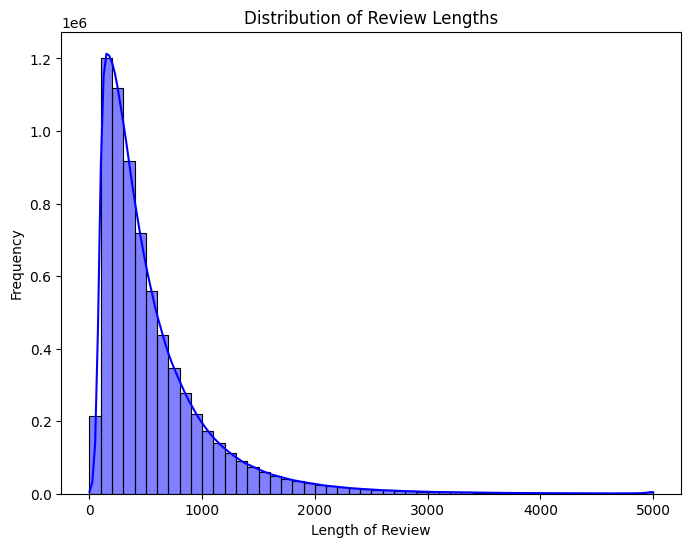

In [79]:
# Calculate the length of each review and store it in a new column
review_data1['review_length'] = review_data1['text'].apply(len)

# Plot the distribution of review lengths
plt.figure(figsize=(8, 6))
sns.histplot(review_data1['review_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Frequency')
plt.show()

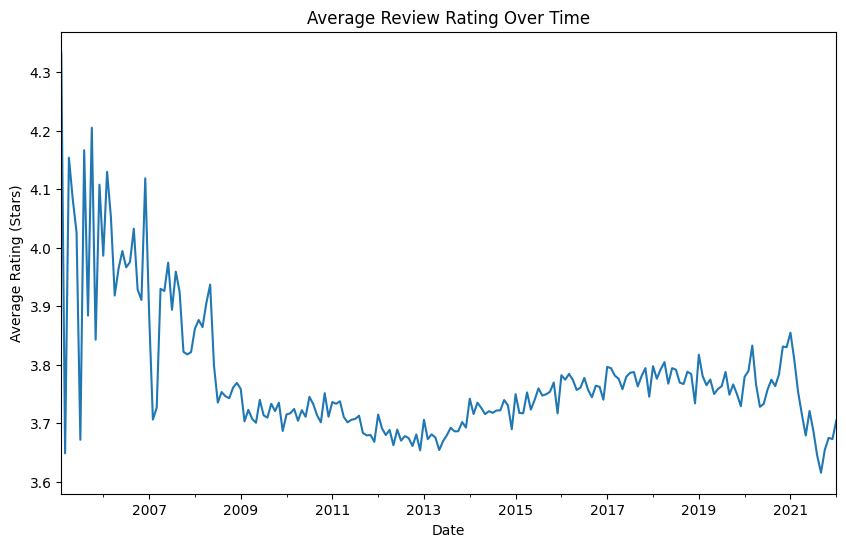

In [80]:
# Convert 'date' column to datetime
review_data1['date'] = pd.to_datetime(review_data1['date'])

# Plot average review rating over time
plt.figure(figsize=(10, 6))
review_data1.resample('M', on='date')['stars'].mean().plot()
plt.title('Average Review Rating Over Time')
plt.xlabel('Date')
plt.ylabel('Average Rating (Stars)')
plt.show()

In [81]:
# Top 10 reviewers
top_reviewers = review_data1['user_id'].value_counts().head(10)
print(top_reviewers)

# Top 10 businesses with most reviews
top_businesses = review_data1['business_id'].value_counts().head(10)
print(top_businesses)

user_id
_BcWyKQL16ndpBdggh2kNA    3048
Xw7ZjaGfr0WNVt6s_5KZfA    1840
0Igx-a1wAstiBDerGxXk2A    1747
-G7Zkl1wIWBBmD0KRy_sCw    1682
ET8n-r7glWYqZhuR6GcdNw    1653
bYENop4BuQepBjM1-BI3fA    1578
1HM81n6n4iPIFU5d2Lokhw    1554
fr1Hz2acAb3OaL3l6DyKNg    1447
wXdbkFZsfDR7utJvbWElyA    1396
Um5bfs5DH6eizgjH3xZsvg    1391
Name: count, dtype: int64
business_id
_ab50qdWOk0DdB6XOrBitw    7673
ac1AeYqs8Z4_e2X5M3if2A    7516
GXFMD0Z4jEVZBCsbPf4CTQ    6160
ytynqOUb3hjKeJfRj5Tshw    5778
oBNrLz4EDhiscSlbOl8uAw    5264
iSRTaT9WngzB8JJ2YKJUig    5254
VQcCL9PiNL_wkGf-uF3fjg    5146
_C7QiQQc47AOEv4PE3Kong    4969
GBTPC53ZrG1ZBY3DT8Mbcw    4661
6a4gLLFSgr-Q6CZXDLzBGQ    4480
Name: count, dtype: int64


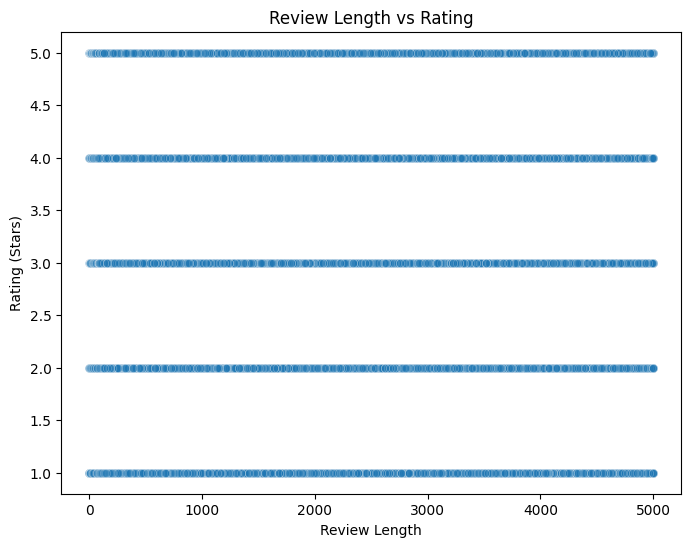

In [82]:
# Plot a scatter plot of review length vs rating
plt.figure(figsize=(8, 6))
sns.scatterplot(x='review_length', y='stars', data=review_data1, alpha=0.3)
plt.title('Review Length vs Rating')
plt.xlabel('Review Length')
plt.ylabel('Rating (Stars)')
plt.show()

TIP DATA

In [83]:
tip_data1.head()

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [84]:
tip_data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           908915 non-null  object
 1   business_id       908915 non-null  object
 2   text              908901 non-null  object
 3   date              908915 non-null  object
 4   compliment_count  908915 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 34.7+ MB


Observations:tip_data contains columns such as user_id, business_id, text, date, and compliment_count.
Most columns are object types (user_id, business_id, text, date), and compliment_count is a numeric column.

In [85]:
# Check for missing values
tip_data1.isnull().sum()

,0
user_id,0
business_id,0
text,14
date,0
compliment_count,0


Findings: We can find that text column has 14 missing values

In [86]:
# Number of unique users
unique_users = tip_data1['user_id'].nunique()

# Number of unique businesses
unique_businesses = tip_data1['business_id'].nunique()

print(f'Unique users: {unique_users}')
print(f'Unique businesses: {unique_businesses}')

Unique users: 301758
Unique businesses: 106193


Findings: We can find that there are 106193 different businesses

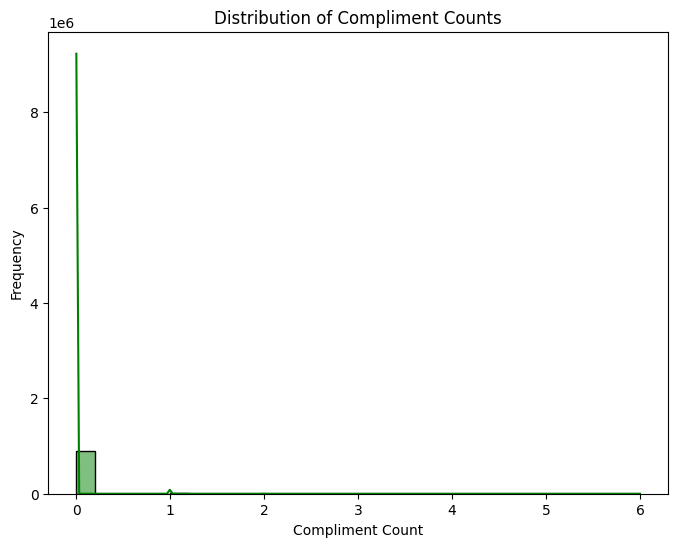

In [87]:
# Plot distribution of compliment_count
plt.figure(figsize=(8, 6))
sns.histplot(tip_data1['compliment_count'], bins=30, kde=True, color='green')
plt.title('Distribution of Compliment Counts')
plt.xlabel('Compliment Count')
plt.ylabel('Frequency')
plt.show()

Findings : This distribution tells us that the range of compliment_count, there are very few tips with low compliments.


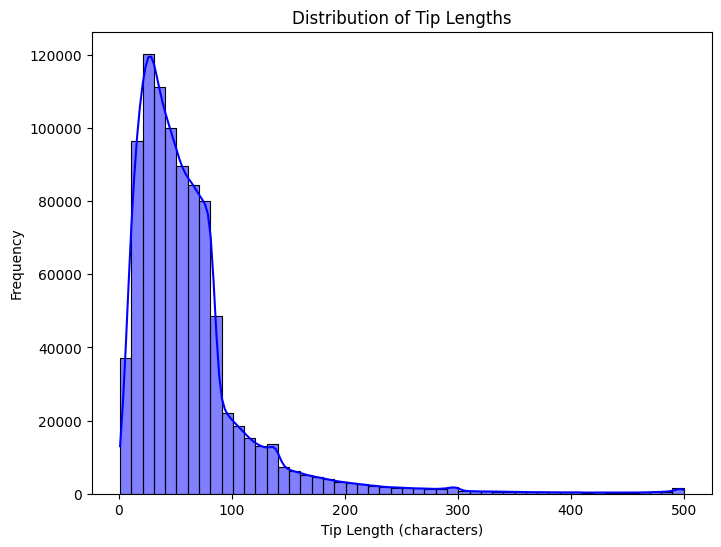

In [88]:
# Create a new column for tip length
tip_data1['tip_length'] = tip_data1['text'].astype(str).apply(len) # Changed line

# Plot distribution of tip lengths
plt.figure(figsize=(8, 6))
sns.histplot(tip_data1['tip_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of Tip Lengths')
plt.xlabel('Tip Length (characters)')
plt.ylabel('Frequency')
plt.show()


In [89]:
# Top 10 users by number of tips
top_users = tip_data1['user_id'].value_counts().head(10)
print('Top 10 users by number of tips:')
print(top_users)

# Top 10 businesses by number of tips
top_businesses = tip_data1['business_id'].value_counts().head(10)
print('Top 10 businesses by number of tips:')
print(top_businesses)

Top 10 users by number of tips:
user_id
fCvMnJU1Z-XhAjKg99wK3Q    4071
5Y5KbsI5buMcNh2hTFaRpA    1385
lMY8NBPyzlPbbu-KBYfD9A    1373
Rr4cLb6Go91FT134o6RsKg    1230
qjfMBIZpQT9DDtw_BWCopQ    1230
-G7Zkl1wIWBBmD0KRy_sCw    1035
sraTrYU-7q_bQ0TxQrLJvQ     902
I2XpWCHAom1JRyHXZQrnfg     821
xWmYN57XXZbg0LOK8WbbFQ     813
zYFGMy1_thjMnvQLX6JNBw     782
Name: count, dtype: int64
Top 10 businesses by number of tips:
business_id
FEXhWNCMkv22qG04E83Qjg    2571
-QI8Qi8XWH3D8y8ethnajA    1011
_ab50qdWOk0DdB6XOrBitw     932
ytynqOUb3hjKeJfRj5Tshw     827
Eb1XmmLWyt_way5NNZ7-Pw     826
c_4c5rJECZSfNgFj7frwHQ     750
ac1AeYqs8Z4_e2X5M3if2A     613
GBTPC53ZrG1ZBY3DT8Mbcw     608
iSRTaT9WngzB8JJ2YKJUig     606
GXFMD0Z4jEVZBCsbPf4CTQ     579
Name: count, dtype: int64


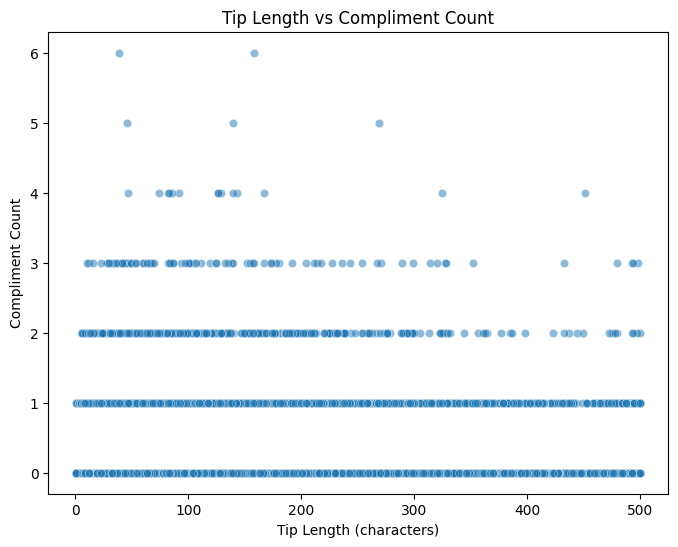

In [90]:
# Scatter plot of tip length vs compliment count
plt.figure(figsize=(8, 6))
sns.scatterplot(x='tip_length', y='compliment_count', data=tip_data1, alpha=0.5)
plt.title('Tip Length vs Compliment Count')
plt.xlabel('Tip Length (characters)')
plt.ylabel('Compliment Count')
plt.show()

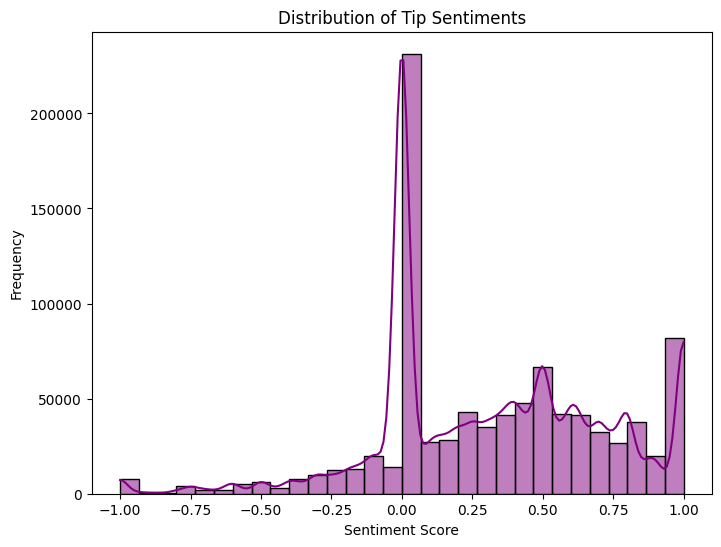

In [91]:
!pip install textblob
# This will install the module textblob
from textblob import TextBlob

# Function to calculate sentiment polarity
def get_sentiment(text):
    # Check if the text is a string before creating a TextBlob object
    if isinstance(text, str):
        return TextBlob(text).sentiment.polarity
    else:
        # Return a default value (e.g., 0) for non-string values
        return 0

# Apply the sentiment function to the 'text' column
tip_data1['sentiment'] = tip_data1['text'].apply(get_sentiment)

# Plot the distribution of sentiment scores
plt.figure(figsize=(8, 6))
sns.histplot(tip_data['sentiment'], bins=30, kde=True, color='purple')
plt.title('Distribution of Tip Sentiments')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

USER DATA

In [92]:
user_data1.head()


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,NaN,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [93]:
user_data1.shape


(1987897, 22)

In [94]:
user_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [95]:
user_data1.describe()


,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06,1.987897e+06
mean,2.339441e+01,4.229634e+01,1.697054e+01,2.379291e+01,1.465740e+00,3.630494e+00,1.807072e+00,2.922631e-01,1.793176e-01,1.336493e-01,6.390723e-02,1.443135e+00,3.011841e+00,2.829308e+00,2.829308e+00,1.056448e+00,1.226859e+00
std,8.256699e+01,6.414806e+02,4.078034e+02,5.653513e+02,1.813075e+01,1.183337e+00,7.360184e+01,1.282467e+01,1.515525e+01,1.135682e+01,1.004363e+01,6.016790e+01,1.193898e+02,9.666385e+01,9.666385e+01,3.217973e+01,9.515751e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.700000e+01,1.300000e+01,2.000000e+00,3.000000e+00,0.000000e+00,4.560000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


Findings: The dataset contains columns like user_id, name, review_count, yelping_since, useful, funny, cool, elite, friends, fans, and average_stars.
Most columns are numerical (review_count, useful, funny, cool, etc.), while some are categorical (elite, friends).

In [96]:
# Check for missing values
user_data1.isnull().sum()

,0
user_id,0
name,37
review_count,0
yelping_since,0
useful,0
funny,0
cool,0
elite,1896699
friends,878551
fans,0


Findings: The columns elite and friends has the maximum number of missing values , hence should be checked and dropped if needed

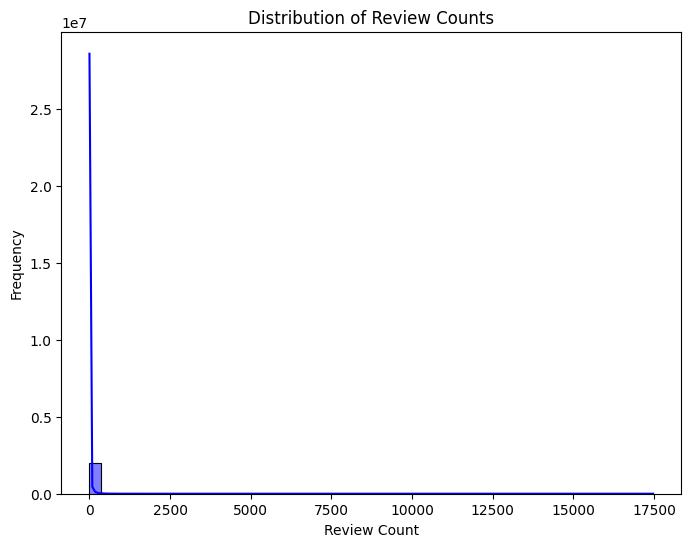

In [97]:
# Plot the distribution of review counts
plt.figure(figsize=(8, 6))
sns.histplot(user_data1['review_count'], bins=50, kde=True, color='blue')
plt.title('Distribution of Review Counts')
plt.xlabel('Review Count')
plt.ylabel('Frequency')
plt.show()

Findings: This shows that less users post small number of reviews less frequently.


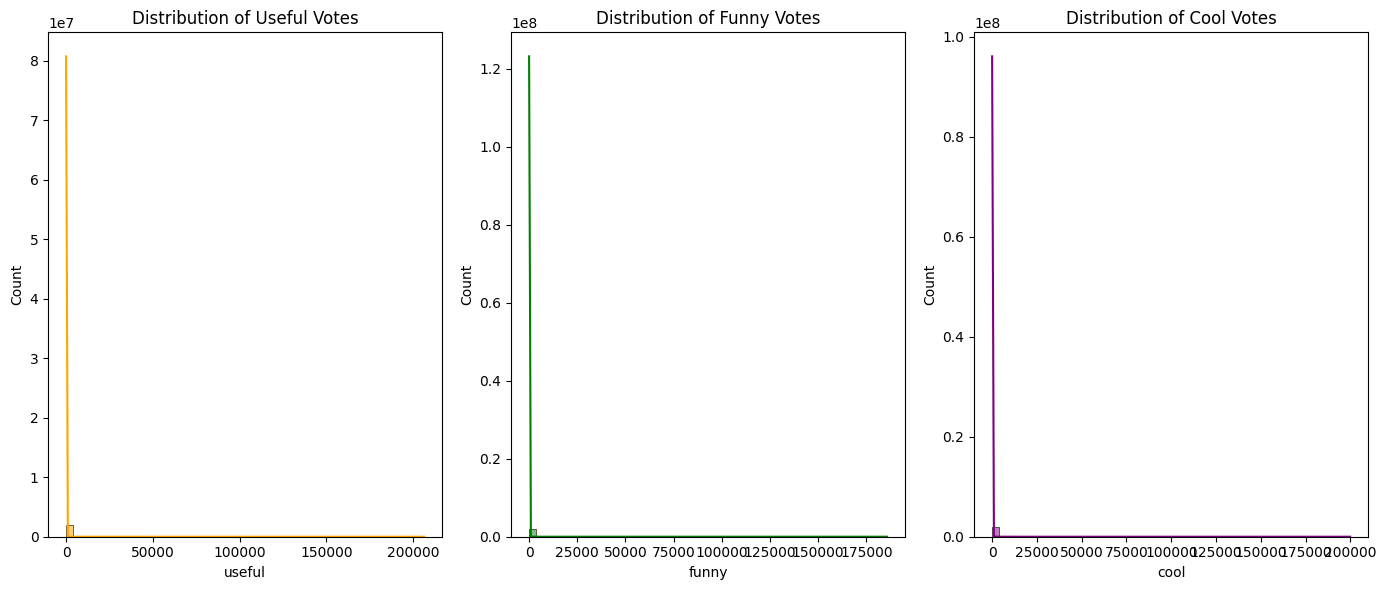

In [98]:
# Plot distribution of 'useful', 'funny', and 'cool' votes
plt.figure(figsize=(14, 6))

plt.subplot(1, 3, 1)
sns.histplot(user_data1['useful'], bins=50, kde=True, color='orange')
plt.title('Distribution of Useful Votes')

plt.subplot(1, 3, 2)
sns.histplot(user_data1['funny'], bins=50, kde=True, color='green')
plt.title('Distribution of Funny Votes')

plt.subplot(1, 3, 3)
sns.histplot(user_data1['cool'], bins=50, kde=True, color='purple')
plt.title('Distribution of Cool Votes')

plt.tight_layout()
plt.show()

Findings : We can analyze the distribution of these votes to understand how users interact with reviews and how often their reviews are marked as useful, funny, or cool. We can see that all the distributions are very small with very less users giving reviews very less frequently



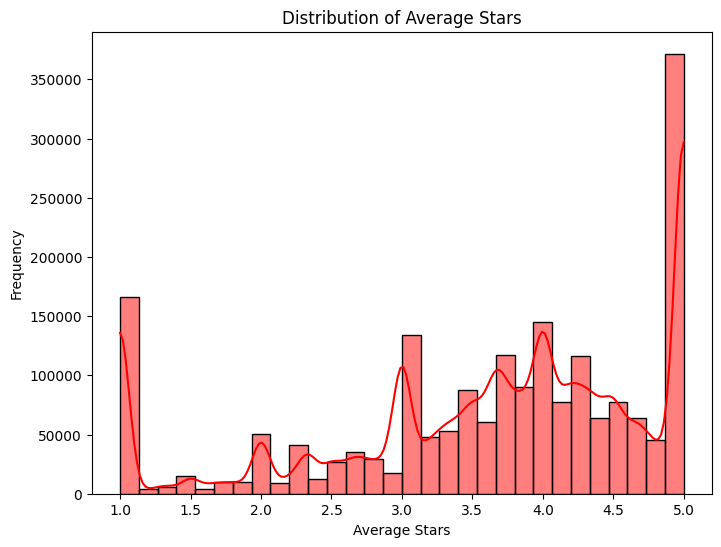

In [99]:
# Plot the distribution of average stars
plt.figure(figsize=(8, 6))
sns.histplot(user_data1['average_stars'], bins=30, kde=True, color='red')
plt.title('Distribution of Average Stars')
plt.xlabel('Average Stars')
plt.ylabel('Frequency')
plt.show()

Findings: We can find that most of the customers tend to give the 5 star rating which can indirectly tell us that most customers are very genorous while rating.

Since the number of rows are too big for the user table and comparitively big for other sheets we have decided to sample the data from the sheets to take 10000 rows to create a model

In [101]:
# Load a sample of the dataset just considering 10000 rows.

business_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_business.csv', nrows=10000)
review_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_review.csv', nrows=10000)
user_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_user.csv', nrows=10000)
checkin_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_checkin.csv', nrows=10000)
tip_data = pd.read_csv('/content/drive/My Drive/yelp_academic_dataset_tip.csv', nrows=10000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   business_id   10000 non-null  object 
 1   name          10000 non-null  object 
 2   address       9677 non-null   object 
 3   city          10000 non-null  object 
 4   state         10000 non-null  object 
 5   postal_code   9997 non-null   object 
 6   latitude      10000 non-null  float64
 7   longitude     10000 non-null  float64
 8   stars         10000 non-null  float64
 9   review_count  10000 non-null  int64  
 10  is_open       10000 non-null  int64  
 11  attributes    9140 non-null   object 
 12  categories    9994 non-null   object 
 13  hours         8492 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.1+ MB
None
Class Counts (Raw):
is_open
1    7967
0    2033
Name: count, dtype: int64

Class Proportions (Percentage):
is_open
1    79.67
0    20.33


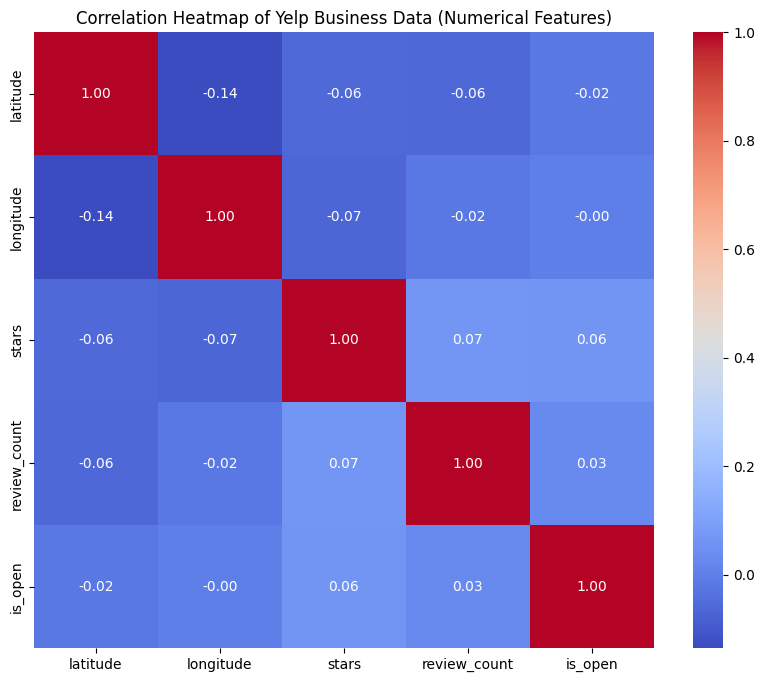

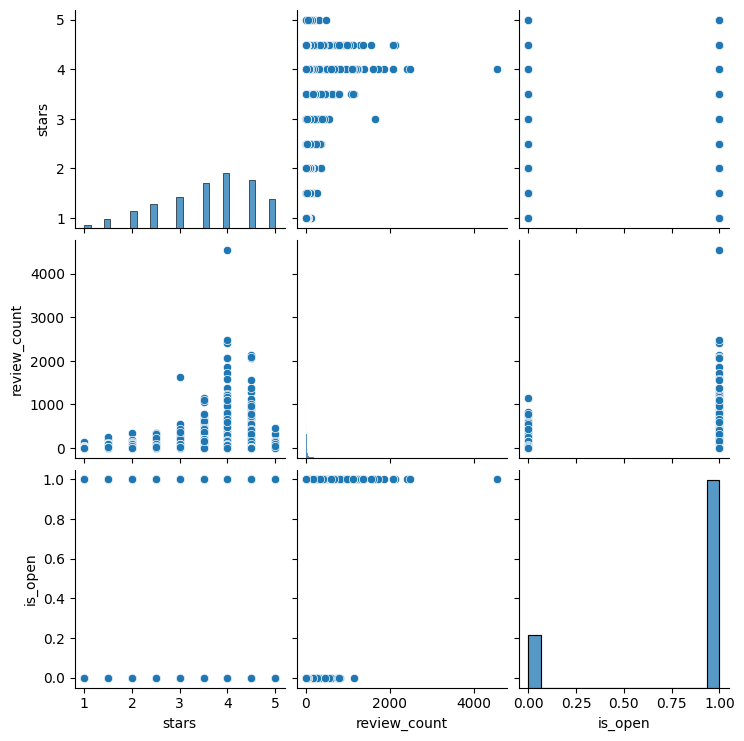

In [102]:
# Check basic info and structure
print(business_data.info())
# Count the occurrences of each class (0 = closed, 1 = open)
is_open_counts = business_data['is_open'].value_counts()

# Display the raw counts
print("Class Counts (Raw):")
print(is_open_counts)

# Calculate the percentage of each class
is_open_percentage = business_data['is_open'].value_counts(normalize=True) * 100

# Display the class proportions
print("\nClass Proportions (Percentage):")
print(is_open_percentage)


# Check for missing values
print(business_data.isnull().sum())

# Summary statistics
print(business_data.describe())

numeric_columns = business_data[['latitude', 'longitude', 'stars', 'review_count', 'is_open']]

# Generate the correlation matrix
correlation_matrix = numeric_columns.corr()
business_data_sample = business_data.sample(n=1000, random_state=42)


# Correlation heatmap for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Yelp Business Data (Numerical Features)')
plt.show()


# Pairplot to visualize relationships between variables like 'stars', 'review_count'
sns.pairplot(business_data[['stars', 'review_count', 'is_open']])
plt.show()

Findings: Latitude and longitude have very low correlations with other variables, including the target feature (likely is_open or some other binary indicator). These features might not contribute significantly to predicting whether a business is validated, hence can be dropped.

City and state can be one-hot encoded or grouped into regions to preserve some regional information. Address and postal code can be dropped.

In [103]:
import json

# Function to safely parse the JSON, even if it has formatting issues
def parse_json_safe(text):
    try:
        # Replace single quotes with double quotes for JSON compatibility
        text = text.replace("'", '"')
        # Attempt to load the JSON
        return json.loads(text)
    except (json.JSONDecodeError, TypeError):
        # If parsing fails, return an empty dictionary
        return {}

# Apply the function to the 'attributes' column
business_data['attributes'] = business_data['attributes'].apply(lambda x: parse_json_safe(x) if isinstance(x, str) else {})

Merged the datasets based on the common attribute- Business_id.

In [105]:
# Merge all columns from business_data into review_data
merged_data = pd.merge(review_data, business_data, on='business_id', how='left')

In [107]:
print(merged_data.columns)
print("Review Data Columns:")
print(review_data.columns)

print("\nBusiness Data Columns:")
print(business_data.columns)

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars_y', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')
Review Data Columns:
Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

Business Data Columns:
Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')


In [108]:
merged_data = pd.merge(review_data, business_data, on='business_id', how='left')
merged_data = merged_data.rename(columns={'stars_y': 'review_stars'})


In [109]:
print("\nMerged Data Columns:")
print(merged_data.columns)



Merged Data Columns:
Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'review_stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')


In [110]:
open_reviews = merged_data[merged_data['is_open'] == 1]
closed_reviews = merged_data[merged_data['is_open'] == 0]

In [111]:
open_summary = open_reviews.describe()
closed_summary = closed_reviews.describe()

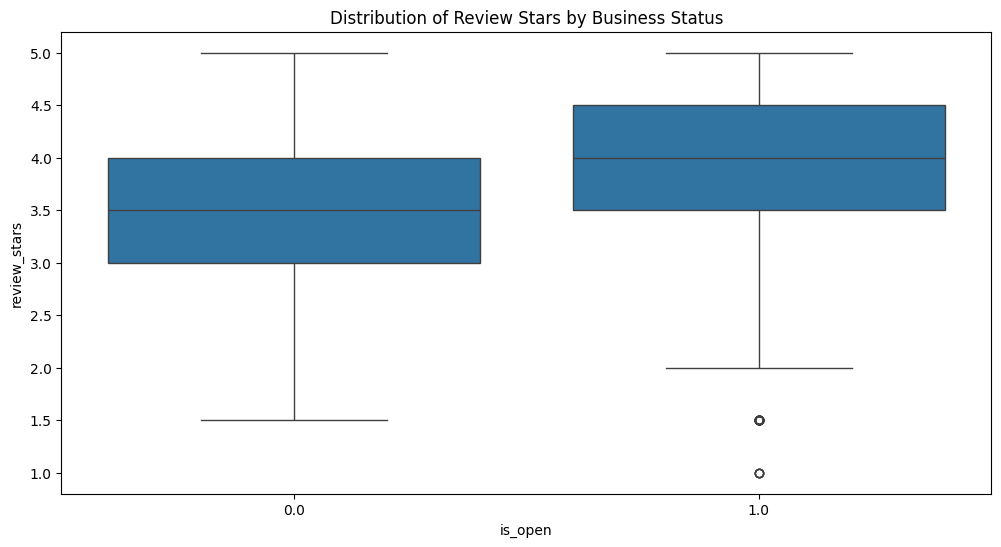

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_open', y='review_stars', data=merged_data)
plt.title('Distribution of Review Stars by Business Status')
plt.show()

Open businesses tend to have better overall ratings compared to closed businesses, with a higher median and a narrower range of review stars. Closed businesses exhibit a wider range of ratings, including lower reviews, possibly indicating that businesses with more varied or poorer reviews are more likely to close. The presence of outliers for both open and closed businesses shows that while most ratings cluster around the median, a few businesses in both categories receive either very low or very high reviews.

In [113]:
review_counts = merged_data['is_open'].value_counts(normalize=True)
print(review_counts)

is_open
1.0    0.758122
0.0    0.241878
Name: proportion, dtype: float64


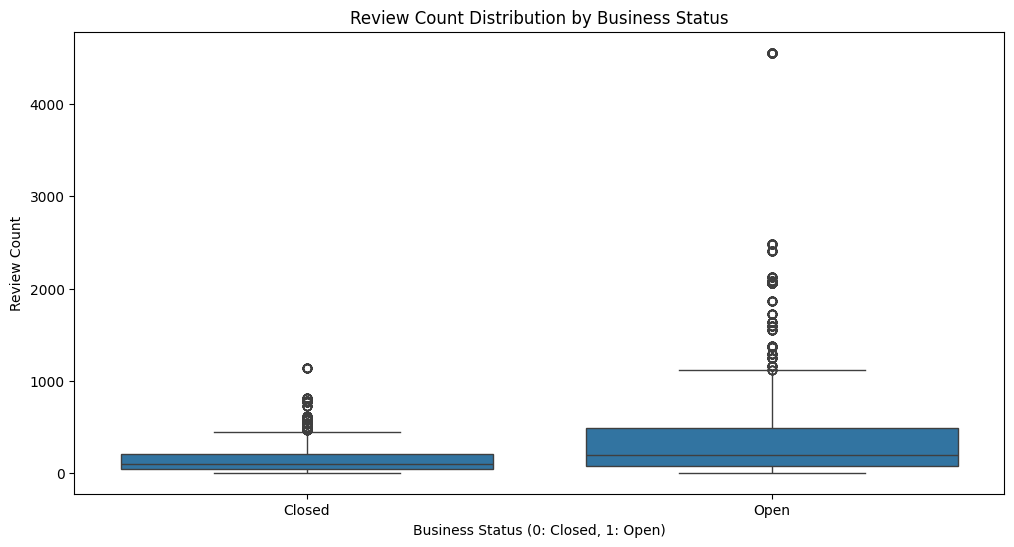

          count        mean         std  min   25%    50%    75%     max
is_open                                                                 
0.0      1638.0  180.458486  223.961128  5.0  41.0   98.5  206.0  1141.0
1.0      5134.0  477.723802  758.929838  5.0  74.0  201.0  492.0  4554.0
Correlation between review count and is_open: 0.19


In [117]:
# 1. Visualize the distribution of review counts
plt.figure(figsize=(12, 6))
sns.boxplot(x='is_open', y='review_count', data=merged_data)
plt.title('Review Count Distribution by Business Status')
plt.xlabel('Business Status (0: Closed, 1: Open)')
plt.ylabel('Review Count')
plt.xticks([0, 1], ['Closed', 'Open'])
plt.show()

# 2. Calculate descriptive statistics
review_stats = merged_data.groupby('is_open')['review_count'].describe()
print(review_stats)

# 3. Correlation analysis
correlation = merged_data['review_count'].corr(merged_data['is_open'])
print(f'Correlation between review count and is_open: {correlation:.2f}')

Open businesses tend to have higher review counts compared to closed businesses, although most businesses in both categories still have relatively low review counts. There are more extreme outliers in the open category, indicating some businesses accumulate significantly more reviews.

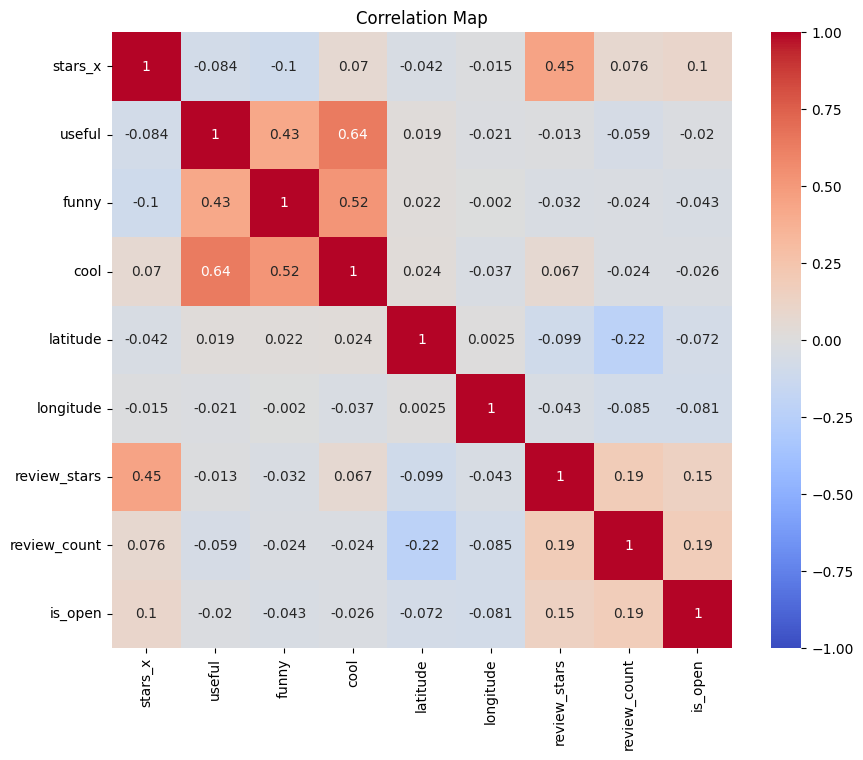

In [118]:
# Select only numeric columns

numeric_data = merged_data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map')
plt.show()

In [119]:
# Get a list of columns with 'categories_' in their name
category_cols = [col for col in merged_data.columns if 'categories_' in col]

# Check the frequency of each category
category_counts = merged_data[category_cols].sum().sort_values(ascending=False)

# Select the top categories and group the others as 'Other'
top_categories = category_counts.head(50).index  # Keep top 50 categories (adjust as needed)

# Create a new 'Other' category for less frequent ones
merged_data['categories_Other'] = merged_data[category_cols].sum(axis=1) - merged_data[top_categories].sum(axis=1)

# Drop all the other category columns except the top ones
merged_data = merged_data.drop([col for col in category_cols if col not in top_categories], axis=1)

In [120]:
print(merged_data.head())
print(merged_data.columns)

                review_id                 user_id             business_id  \
0  KU_O5udG6zpxOg-VcAEodg  mh_-eMZ6K5RLWhZyISBhwA  XQfwVwDr-v0ZS3_CbbE5Xw   
1  BiTunyQ73aT9WBnpR9DZGw  OyoGAe7OKpv6SyGZT5g77Q  7ATYjTIgM3jUlt4UM3IypQ   
2  saUsX_uimxRlCVr67Z4Jig  8g_iMtfSiwikVnbP2etR0A  YjUWPpI6HXG530lwP-fb2A   
3  AqPFMleE6RsU23_auESxiA  _7bHUi9Uuf5__HHc_Q8guQ  kxX2SOes4o-D3ZQBkiMRfA   
4  Sx8TMOWLNuJBWer-0pcmoA  bcjbaE6dDog4jkNY91ncLQ  e4Vwtrqf-wpJfwesgvdgxQ   

   stars_x  useful  funny  cool  \
0        3       0      0     0   
1        5       1      0     1   
2        3       0      0     0   
3        5       1      0     1   
4        4       1      0     1   

                                                text                 date  \
0  If you decide to eat here, just be aware it is...  2018-07-07 22:09:11   
1  I've taken a lot of spin classes over the year...  2012-01-03 15:28:18   
2  Family diner. Had the buffet. Eclectic assortm...  2014-02-05 20:30:30   
3  Wow!  Yummy, di

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   user_id             10000 non-null  object 
 1   name                10000 non-null  object 
 2   review_count        10000 non-null  int64  
 3   yelping_since       10000 non-null  object 
 4   useful              10000 non-null  int64  
 5   funny               10000 non-null  int64  
 6   cool                10000 non-null  int64  
 7   elite               4933 non-null   object 
 8   friends             10000 non-null  object 
 9   fans                10000 non-null  int64  
 10  average_stars       10000 non-null  float64
 11  compliment_hot      10000 non-null  int64  
 12  compliment_more     10000 non-null  int64  
 13  compliment_profile  10000 non-null  int64  
 14  compliment_cute     10000 non-null  int64  
 15  compliment_list     10000 non-null  int64  
 16  compl

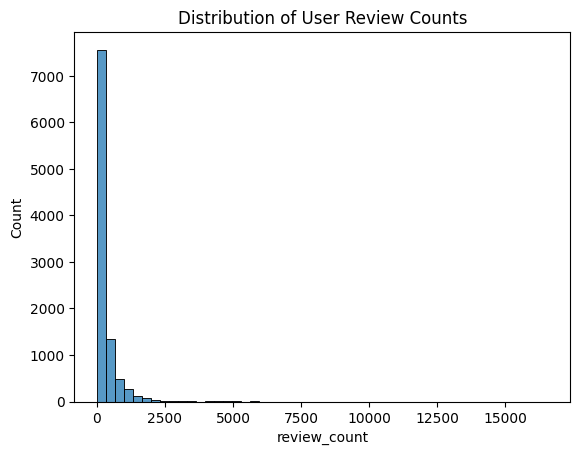

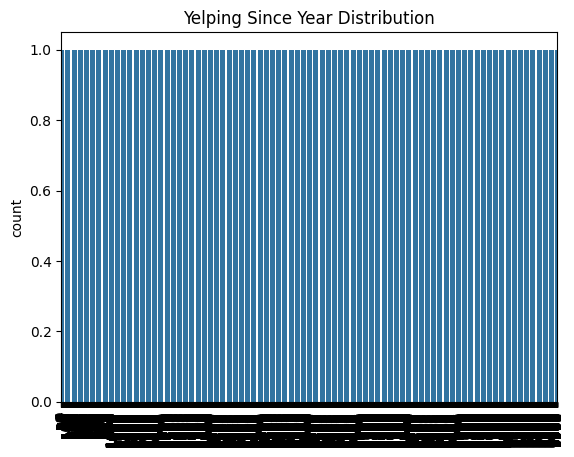

In [121]:
print(user_data.info())
print(user_data.isnull().sum())

# Distribution of review count per user
sns.histplot(user_data['review_count'], bins=50)
plt.title('Distribution of User Review Counts')
plt.show()

# Users joining trends
user_data['yelping_since'] = pd.to_datetime(user_data['yelping_since'])
user_data['year_joined'] = user_data['yelping_since'].dt.year
sns.countplot(user_data['year_joined'])
plt.title('Yelping Since Year Distribution')
plt.xticks(rotation=90)
plt.show()

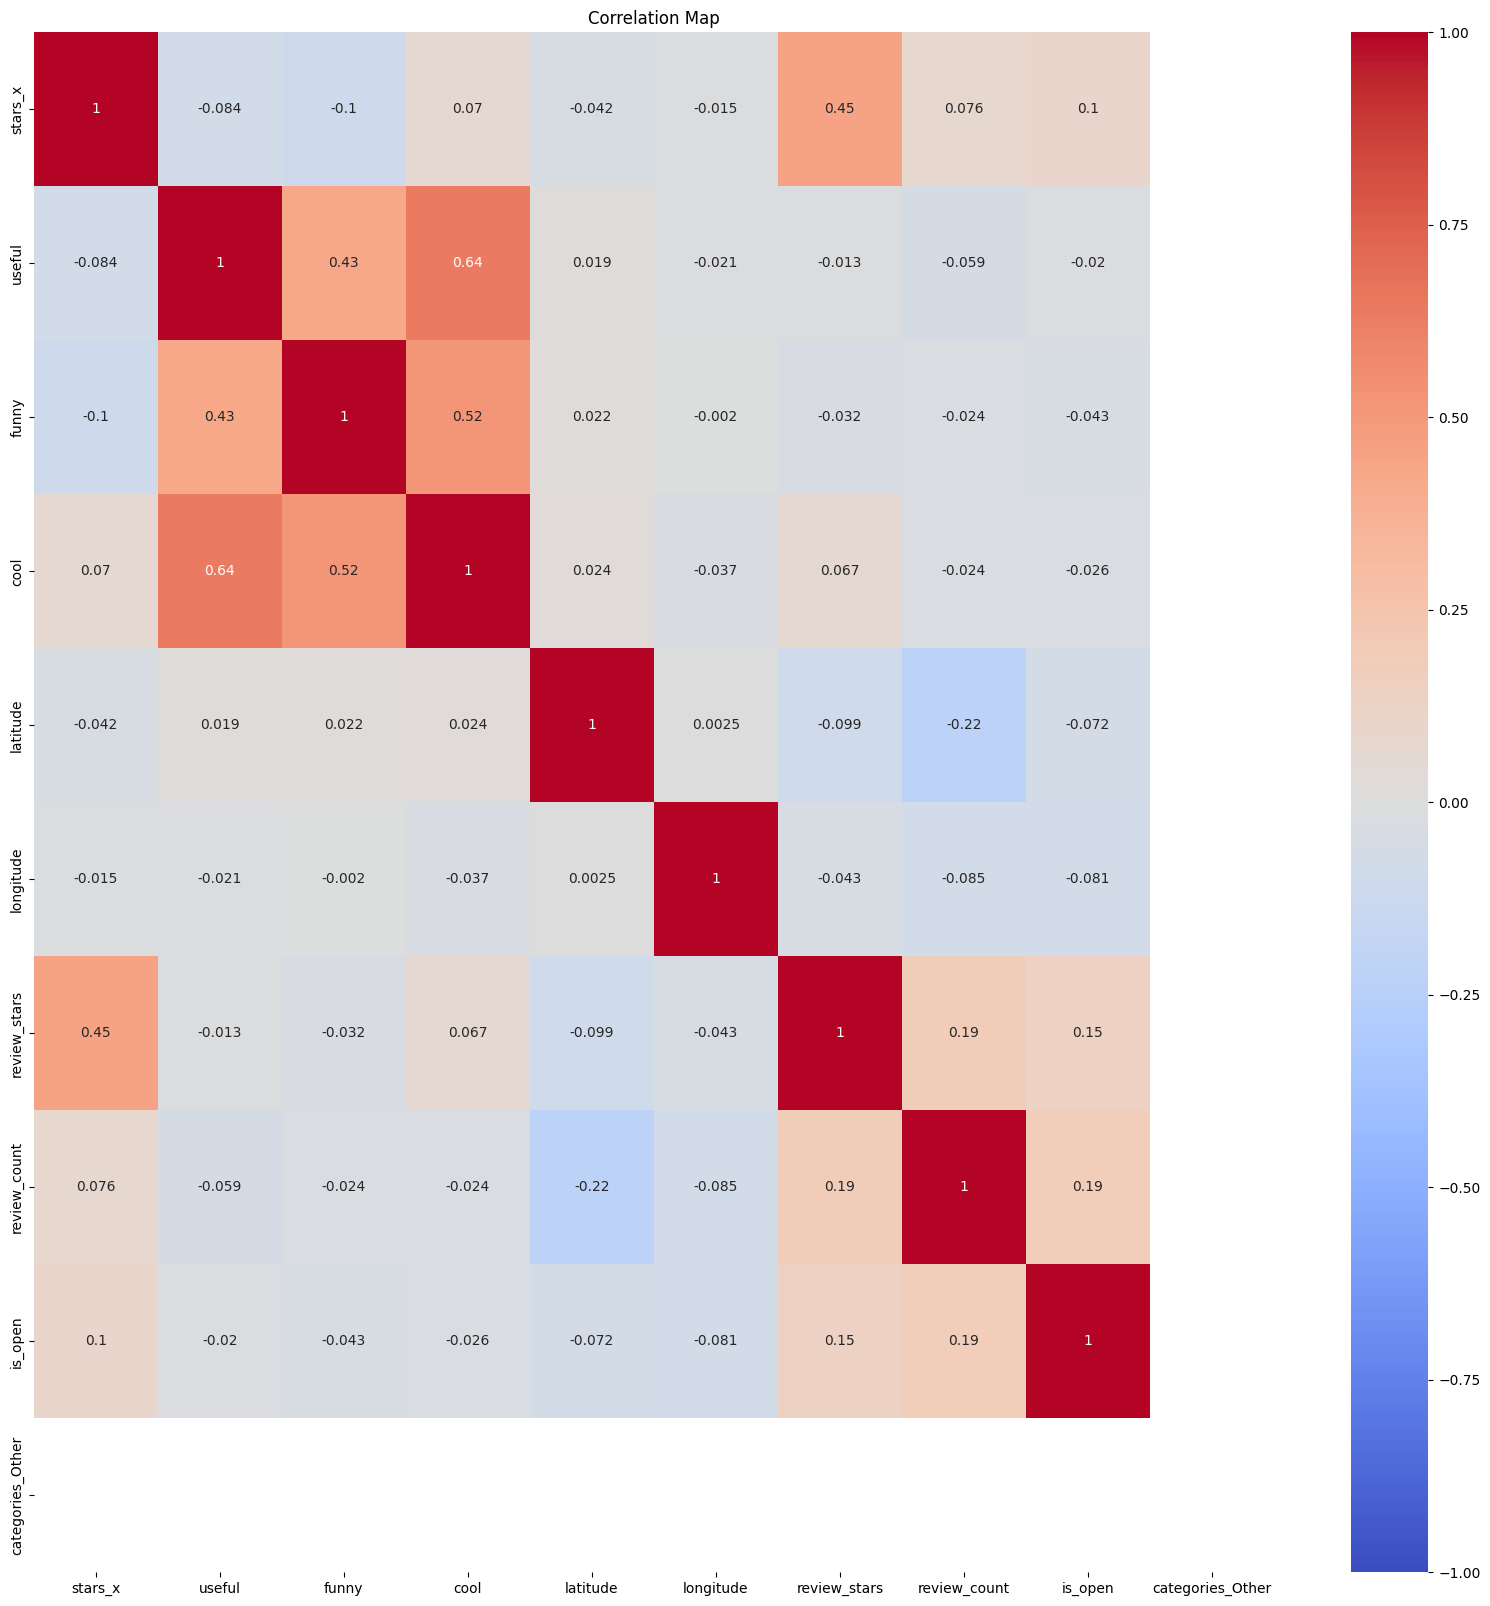

In [122]:
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(20,20))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map')
plt.show()

In [123]:
# Find the correlation of 'is_open' with other columns
correlation_with_is_open = numeric_data.corr()['is_open'].sort_values(ascending=False)
print(correlation_with_is_open)


is_open             1.000000
review_count        0.186694
review_stars        0.147482
stars_x             0.101445
useful             -0.020367
cool               -0.026467
funny              -0.043372
latitude           -0.072217
longitude          -0.081121
categories_Other         NaN
Name: is_open, dtype: float64


In [124]:
# List of compliment columns to drop
compliment_columns = [
    'compliment_hot_x', 'compliment_more_x', 'compliment_profile_x',
    'compliment_cute_x', 'compliment_list_x', 'compliment_note_x',
    'compliment_photos_x', 'compliment_plain_x', 'compliment_funny_x',
    'compliment_writer_x', 'compliment_cool_x'
]

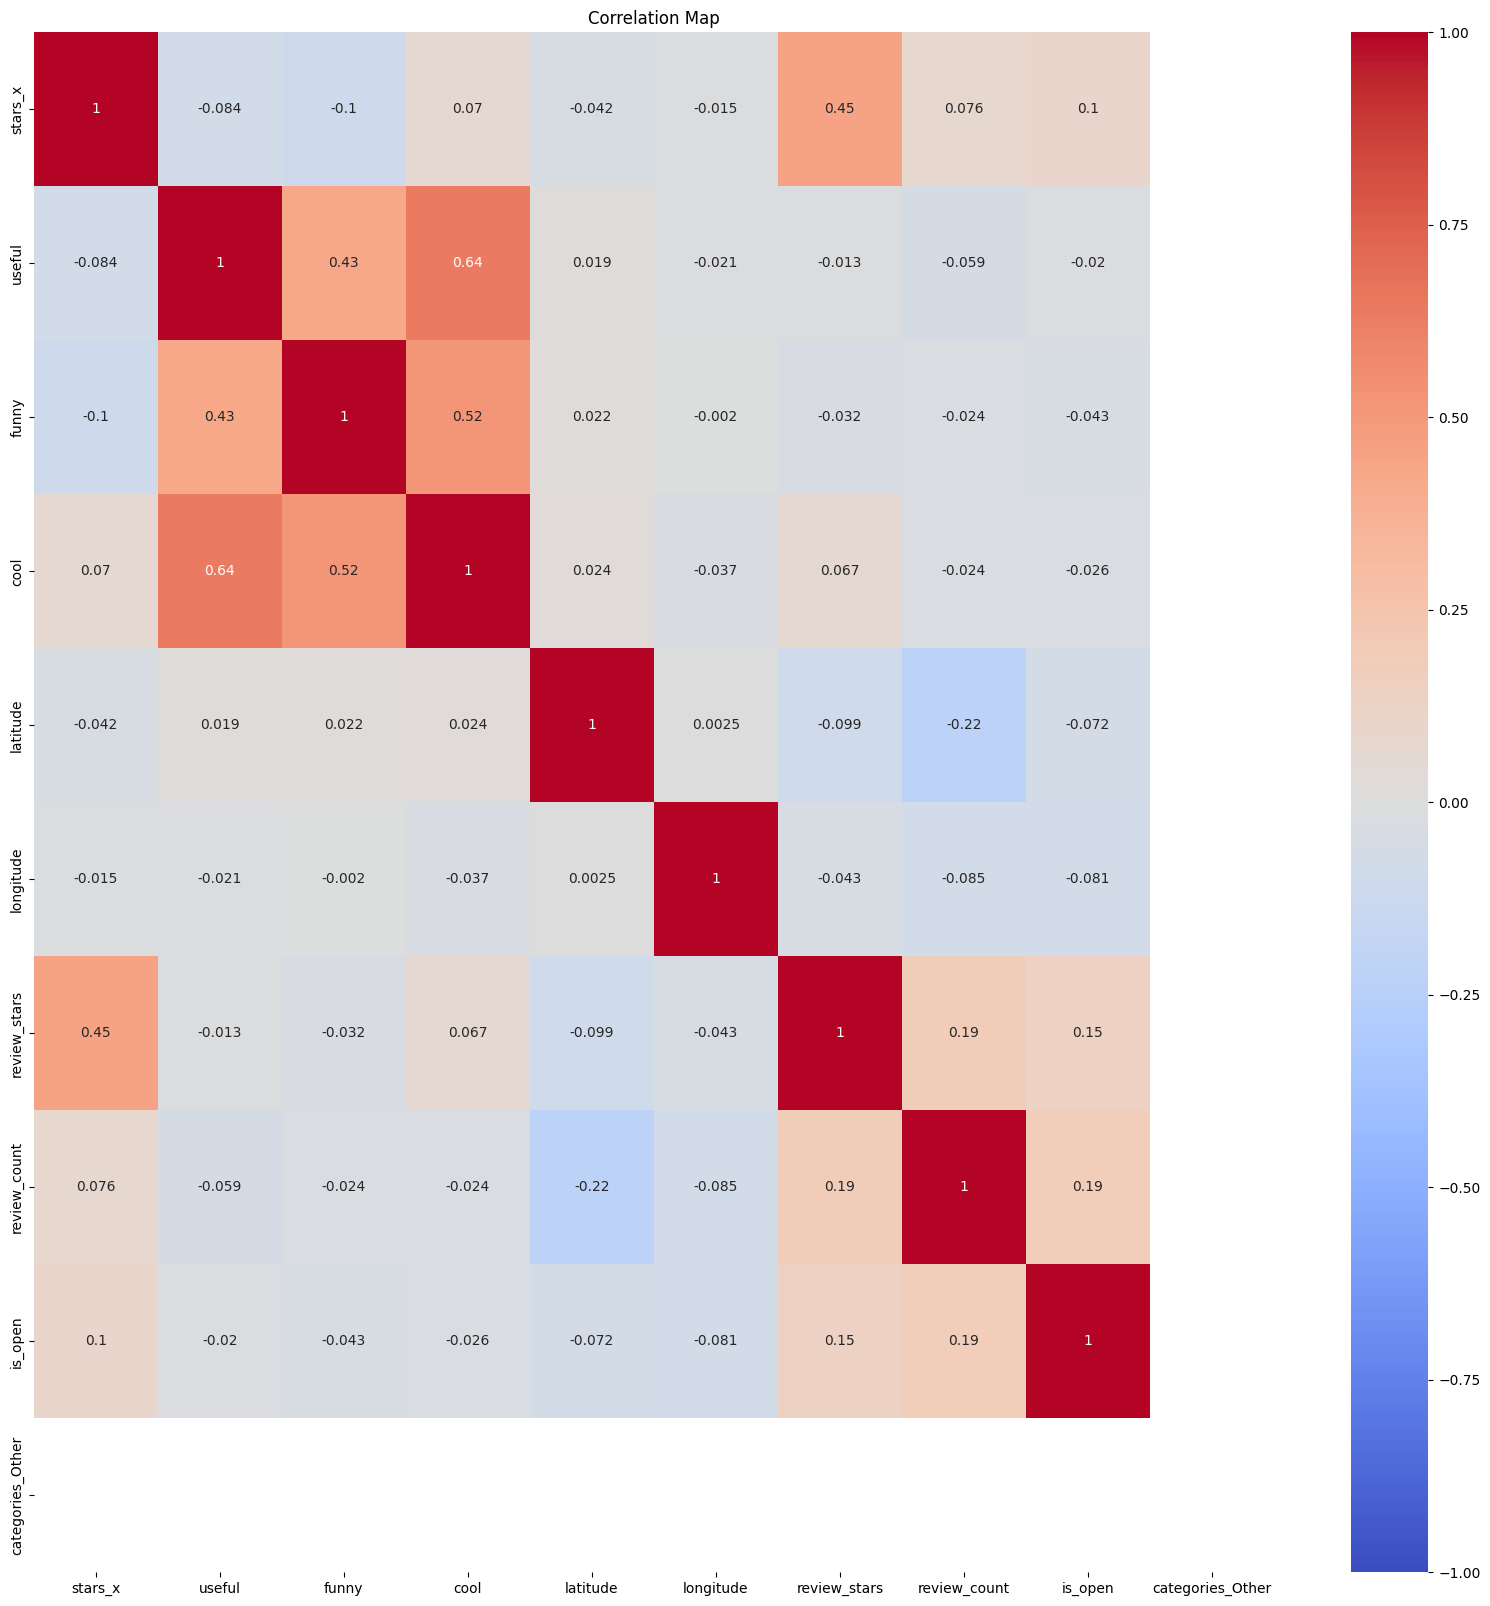

In [125]:
# Select only numeric columns
numeric_data = merged_data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()
# Plot the heatmap
plt.figure(figsize=(20,20))  # Set the size of the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Map')
plt.show()

In [126]:
# Find the correlation of 'is_open' with other columns
correlation_with_is_open = numeric_data.corr()['is_open'].sort_values(ascending=False)
print(correlation_with_is_open)

is_open             1.000000
review_count        0.186694
review_stars        0.147482
stars_x             0.101445
useful             -0.020367
cool               -0.026467
funny              -0.043372
latitude           -0.072217
longitude          -0.081121
categories_Other         NaN
Name: is_open, dtype: float64


User engagement metrics seem to have little influence on whether a business is open. This could suggest that user reviews and interactions are more reflective of existing business conditions rather than driving them.



In [127]:
checkin_data.rename(columns={'date': 'checkin_date', 'month': 'checkin_month'}, inplace=True)

print(checkin_data.columns)  # Ensure this is called after the rename
print(merged_data.columns)

Index(['business_id', 'checkin_date'], dtype='object')
Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'name', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'review_stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'categories_Other'],
      dtype='object')


In [128]:
merged_data = pd.merge(checkin_data, merged_data, on='business_id', how='inner')

In [130]:
merged_data.head()

,business_id,checkin_date,review_id,user_id,stars_x,useful,funny,cool,text,date,...,postal_code,latitude,longitude,review_stars,review_count,is_open,attributes,categories,hours,categories_Other
0,--ZVrH2X2QXBFdCilbirsw,"2010-08-12 18:21:29, 2010-08-20 17:49:17, 2012...",7snN_xdG7dtX4u1bdoNq0w,7iCjHZY74yCEF-Eajx5sIA,5,0,0,0,This place is sadly perm closed. I was hoping ...,2018-02-24 00:53:41,...,19003,39.997299,-75.292207,4.5,32.0,0.0,{},"American (Traditional), Restaurants, Pizza, Sa...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.0
1,-02xFuruu85XmDn2xiynJw,"2012-01-17 00:27:09, 2012-01-26 23:24:22, 2012...",DivPlXLvBcH0N9z1y1K7MQ,rp8AfN3VT2I6nykW6FWqkw,5,0,0,0,Dr. Curtis Dechant has an excellent chair-side...,2012-07-16 17:03:37,...,85715,32.251039,-110.833173,4.5,109.0,1.0,{},"Shopping, Ophthalmologists, Optometrists, Doct...","{'Monday': '0:0-0:0', 'Tuesday': '8:30-17:30',...",0.0
2,-1MhPXk1FglglUAmuPLIGg,"2010-02-18 06:23:47, 2010-04-09 05:41:02, 2010...",QKIxj1rzm-xqzm0P9NCIJg,DQLU6yMeEQ2EUSAwlvgZLg,5,0,0,0,Great food and drink. The staff are always fri...,2016-03-31 02:18:32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,-1ueCbvIpUPi8KT95ETTKw,"2010-11-09 00:23:41, 2010-11-19 06:54:43, 2010...",0hZ_XJLTeT_gczNft2FuJA,FicCNBqnx9eBW2h7J0xyDQ,5,0,0,0,I was very happy here.there is a shower with a...,2016-01-30 03:30:32,...,89502,39.504421,-119.779589,4.0,167.0,1.0,{},"Hotels, Hotels & Travel, Event Planning & Serv...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",0.0
4,-2Axhv9AZ_n7qjQefECpVw,"2015-06-10 00:51:46, 2015-06-13 18:42:01, 2015...",kAfyIkbXL1TUXEET2hrCcQ,7c1pB6oft1gKrBO1cpJdyw,3,0,0,0,"The service was excellent, extremely friendly....",2017-05-13 22:06:53,...,37076,36.216608,-86.596364,3.5,21.0,0.0,{},"Greek, Mediterranean, Restaurants, American (T...","{'Monday': '11:0-21:0', 'Tuesday': '11:0-21:0'...",0.0


In [131]:
merged_data.columns

Index(['business_id', 'checkin_date', 'review_id', 'user_id', 'stars_x',
       'useful', 'funny', 'cool', 'text', 'date', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'review_stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'categories_Other'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           10000 non-null  object
 1   business_id       10000 non-null  object
 2   text              10000 non-null  object
 3   date              10000 non-null  object
 4   compliment_count  10000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 390.8+ KB
user_id             0
business_id         0
text                0
date                0
compliment_count    0
dtype: int64


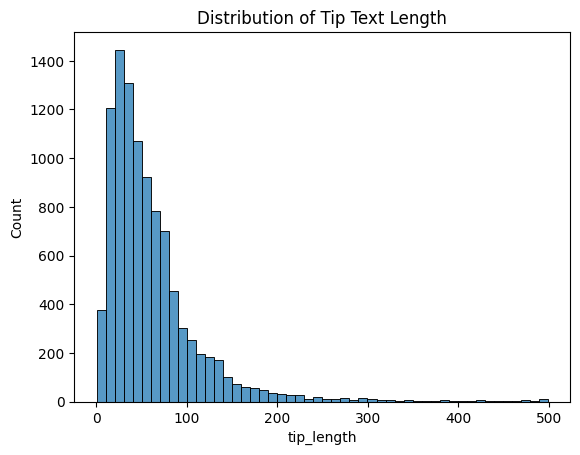

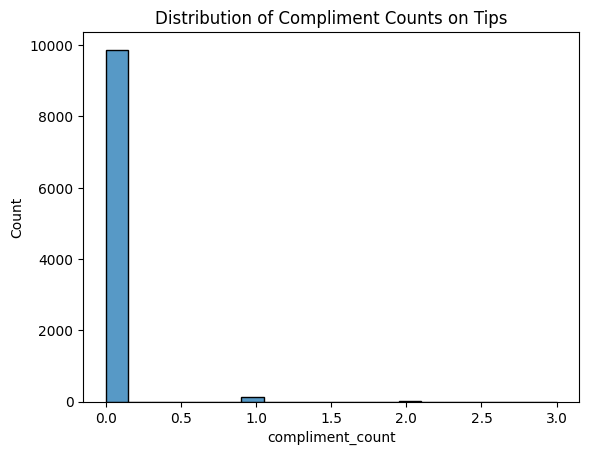

In [132]:
tip_data.info()
print(tip_data.isnull().sum())

# Analyzing tips length
tip_data['tip_length'] = tip_data['text'].apply(len)
sns.histplot(tip_data['tip_length'], bins=50)
plt.title('Distribution of Tip Text Length')
plt.show()

# Compliment distribution
sns.histplot(tip_data['compliment_count'], bins=20)
plt.title('Distribution of Compliment Counts on Tips')
plt.show()

In [133]:
tip_data.rename(columns={'date': 'tips_date'}, inplace=True)


In [134]:
merged_data = pd.merge(merged_data, tip_data, on=['business_id', 'user_id'], how='inner')


In [135]:
merged_data.head()

,business_id,checkin_date,review_id,user_id,stars_x,useful,funny,cool,text_x,date,...,review_count,is_open,attributes,categories,hours,categories_Other,text_y,tips_date,compliment_count,tip_length
0,37BpNvlEAT6WVGsksrHbBQ,"2010-01-21 01:34:59, 2010-02-22 19:46:50, 2010...",u7ZPpKtRexbTpNqgtW_nAA,03orKt4OrwqPo4gg4ZPL7w,4,0,0,0,The sushi here is so much fun! I love seeing s...,2010-08-22 18:53:51,...,NaN,NaN,NaN,NaN,NaN,0.0,Yum sushi. Not crowded for lunch.,2010-03-17 18:49:10,0,33


In [136]:
merged_data.columns

Index(['business_id', 'checkin_date', 'review_id', 'user_id', 'stars_x',
       'useful', 'funny', 'cool', 'text_x', 'date', 'name', 'address', 'city',
       'state', 'postal_code', 'latitude', 'longitude', 'review_stars',
       'review_count', 'is_open', 'attributes', 'categories', 'hours',
       'categories_Other', 'text_y', 'tips_date', 'compliment_count',
       'tip_length'],
      dtype='object')